# Copartitioned vs separate sources

By Sean McGuire

In [1]:
import lsdb
import numpy as np
import pandas as pd
from hipscat.inspection import plot_pixels
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
import healpy as hp

### Reading in the Catalogs

In [2]:
sso1m = lsdb.read_hipscat("/data3/epyc/projects3/sean_hipscat/data/small_sky_order1_source_margin")
sso1m

,source_id,source_ra,source_dec,mjd,mag,band,object_id,object_ra,object_dec,Norder,Dir,Npix,margin_Norder,margin_Dir,margin_Npix
npartitions=5,,,,,,,,,,,,,,,
4611686018427387904,int64,float64,float64,float64,float64,string,int64,float64,float64,uint8,uint64,uint64,uint8,uint64,uint64
12682136550675316736,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13546827679130451968,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18446744073709551615,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [3]:
sso1_source = lsdb.read_hipscat("/data3/epyc/projects3/sean_hipscat/data/small_sky_order1_source", margin_cache=sso1m)
sso1_source

,source_id,source_ra,source_dec,mjd,mag,band,object_id,object_ra,object_dec,Norder,Dir,Npix
npartitions=5,,,,,,,,,,,,
4611686018427387904,int64,float64,float64,float64,float64,string,int64,float64,float64,uint8,uint64,uint64
12682136550675316736,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...
13546827679130451968,...,...,...,...,...,...,...,...,...,...,...,...
18446744073709551615,...,...,...,...,...,...,...,...,...,...,...,...


In [4]:
sso1 = lsdb.read_hipscat("/data3/epyc/projects3/sean_hipscat/data/small_sky_order1")
sso1

,id,ra,dec,ra_error,dec_error,Norder,Dir,Npix
npartitions=4,,,,,,,,
12682136550675316736,int64,float64,float64,int64,int64,uint8,uint64,uint64
12970366926827028480,...,...,...,...,...,...,...,...
13258597302978740224,...,...,...,...,...,...,...,...
13546827679130451968,...,...,...,...,...,...,...,...
18446744073709551615,...,...,...,...,...,...,...,...


In [5]:
sso1_source_oldm = lsdb.read_hipscat("/data3/epyc/projects3/sean_hipscat/data/sso1_source_old_margin")
sso1_source_oldm

,source_id,source_ra,source_dec,mjd,mag,band,object_id,object_ra,object_dec,Norder,Dir,Npix,margin_Norder,margin_Dir,margin_Npix
npartitions=5,,,,,,,,,,,,,,,
4611686018427387904,int64,float64,float64,float64,float64,string,int64,float64,float64,uint8,uint64,uint64,uint8,uint64,uint64
12682136550675316736,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13546827679130451968,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18446744073709551615,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [6]:
sso1_source_old = lsdb.read_hipscat("/data3/epyc/projects3/sean_hipscat/data/sso1_source_old", margin_cache=sso1_source_oldm)
sso1_source_old

,source_id,source_ra,source_dec,mjd,mag,band,object_id,object_ra,object_dec,Norder,Dir,Npix
npartitions=4,,,,,,,,,,,,
12682136550675316736,int64,float64,float64,float64,float64,string,int64,float64,float64,uint8,uint64,uint64
12970366926827028480,...,...,...,...,...,...,...,...,...,...,...,...
13258597302978740224,...,...,...,...,...,...,...,...,...,...,...,...
13546827679130451968,...,...,...,...,...,...,...,...,...,...,...,...
18446744073709551615,...,...,...,...,...,...,...,...,...,...,...,...


### Plotting the Catalogs

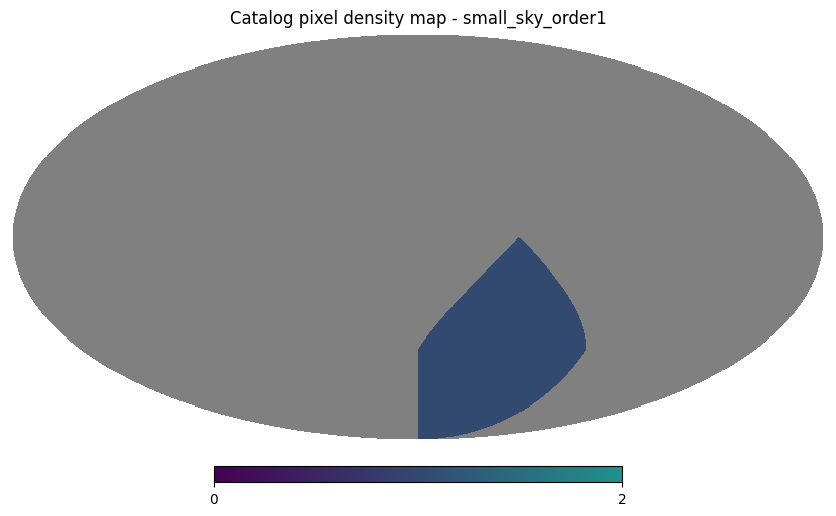

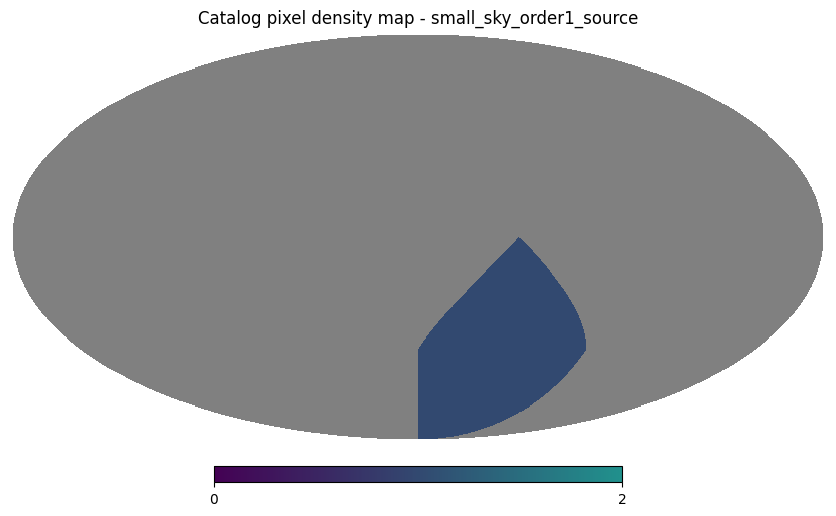

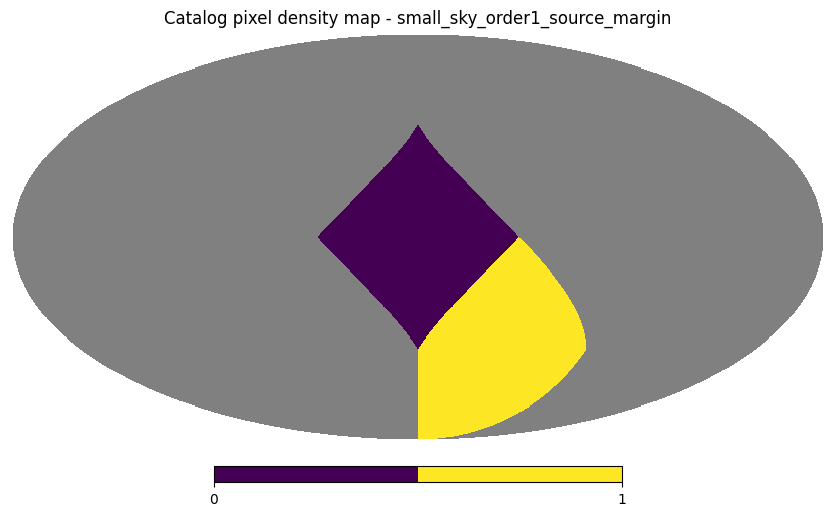

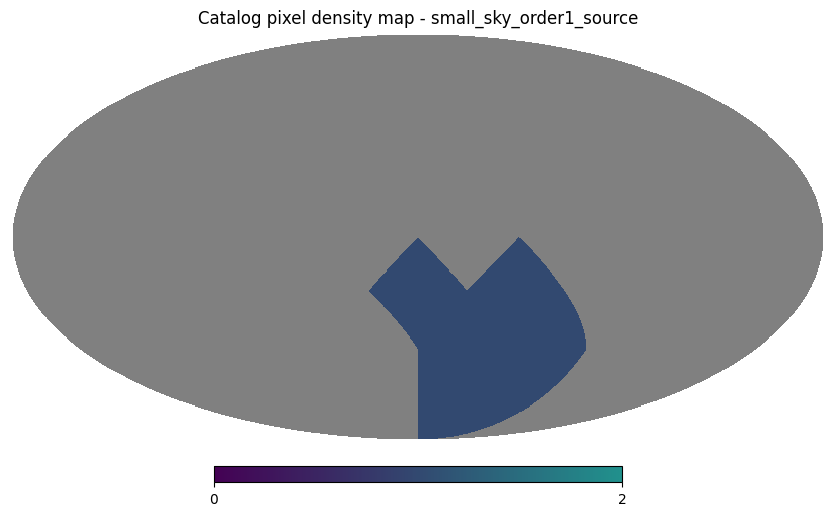

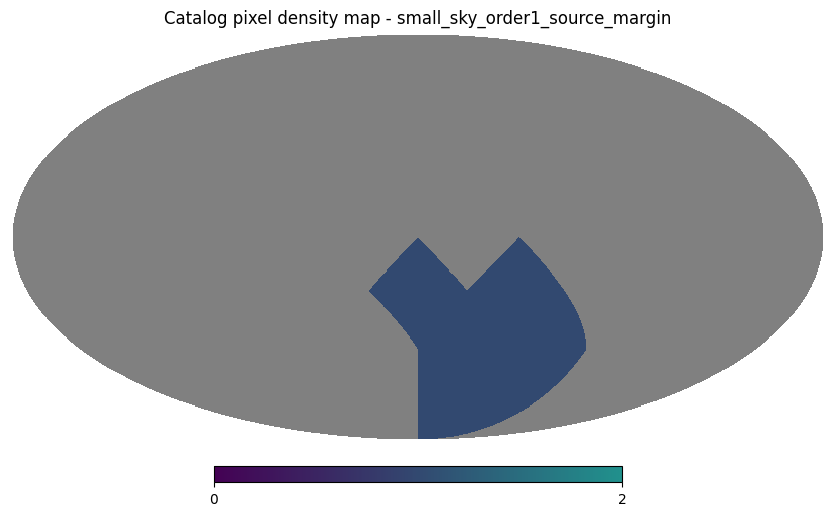

In [7]:
plot_pixels(sso1.hc_structure)
plot_pixels(sso1_source_old.hc_structure)
plot_pixels(sso1_source_oldm.hc_structure)
plot_pixels(sso1_source.hc_structure)
plot_pixels(sso1_source.margin.hc_structure)

This margin catalog is an example of negative margin pixels, where the margin includes pixels not in the original catalog where there are points close to a boundary with empty space. 

In [8]:
order = 1
pixel = 45

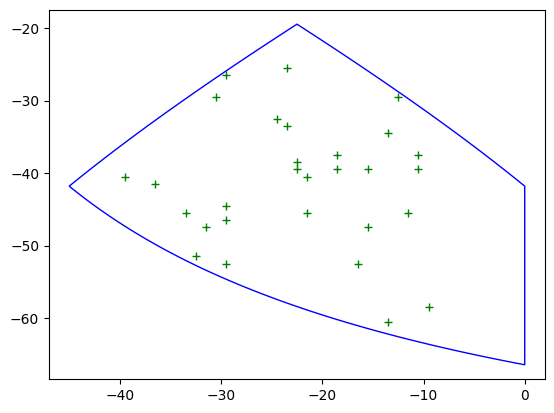

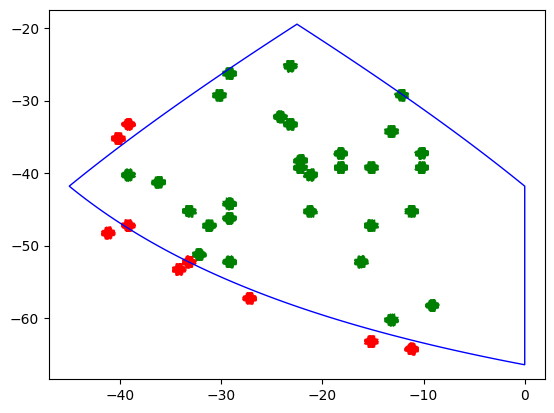

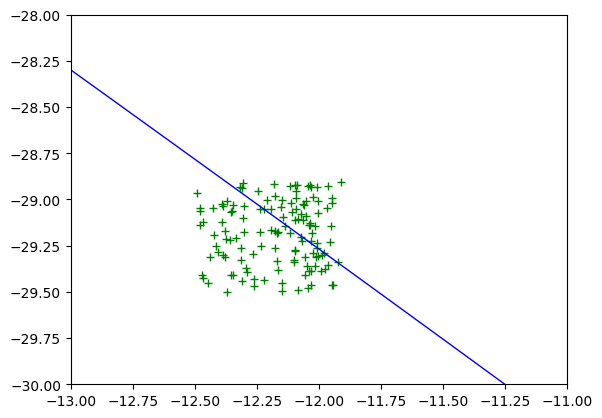

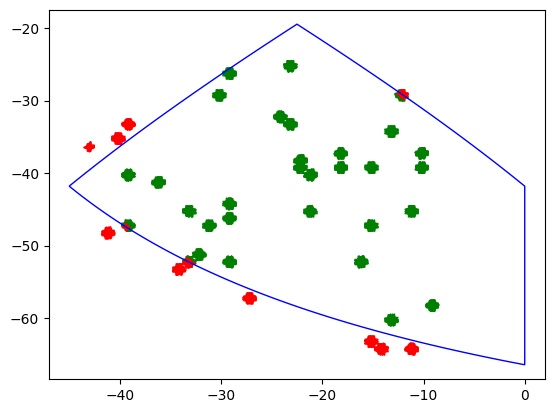

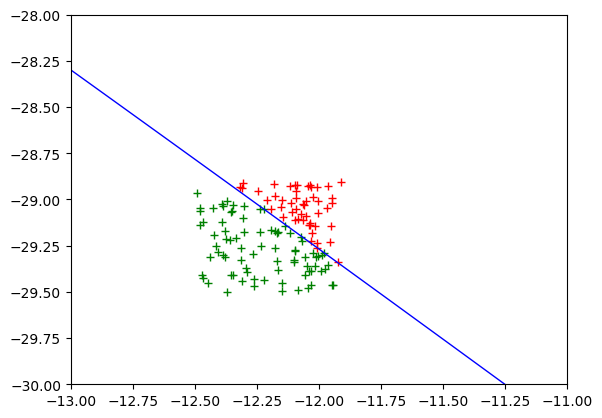

In [9]:
def plot_points(pixel_dfs, order, pixel, colors, ra_columns, dec_columns, xlim=None, ylim=None, alpha=1):
    ax = plt.subplot()

    # Plot hp pixel bounds
    nsides = hp.order2nside(order)
    pix0_bounds = hp.vec2dir(hp.boundaries(nsides, pixel, step=100, nest=True), lonlat=True)
    lon = pix0_bounds[0]
    lat = pix0_bounds[1]
    vertices = np.vstack([lon.ravel(), lat.ravel()]).transpose()
    p = Polygon(vertices, closed=True, edgecolor='blue', facecolor='none')

    for pixel_df, color, ra_column, dec_column in zip(pixel_dfs, colors, ra_columns, dec_columns):
        ax.scatter(pixel_df[ra_column].values - 360, pixel_df[dec_column].values, c=color, marker='+', linewidths=1, alpha=alpha)
    ax.add_patch(p)

    VIEW_MARGIN = 2

    xlim_low = np.min(lon) - VIEW_MARGIN if xlim is None else xlim[0]
    xlim_high = np.max(lon) + VIEW_MARGIN if xlim is None else xlim[1]
    ylim_low = np.min(lat) - VIEW_MARGIN if ylim is None else ylim[0]
    ylim_high = np.max(lat) + VIEW_MARGIN if ylim is None else ylim[1]

    plt.xlim(xlim_low, xlim_high)
    plt.ylim(ylim_low, ylim_high)
    plt.show()

plot_points([sso1.get_partition(order, pixel).compute()], order, pixel, ['green'], ['ra'], ['dec'])

plot_points([sso1_source_old.get_partition(order, pixel).compute(), sso1_source_old.margin.get_partition(order, pixel).compute()], order, pixel, ['green', 'red'], ['source_ra', 'source_ra'], ['source_dec', 'source_dec'])

plot_points([sso1_source_old.get_partition(order, pixel).compute(), sso1_source_old.margin.get_partition(order, pixel).compute()], order, pixel, ['green', 'red'], ['source_ra', 'source_ra'], ['source_dec', 'source_dec'], xlim=[-13, -11], ylim=[-30, -28])

plot_points([sso1_source.get_partition(order, pixel).compute(), sso1_source.margin.get_partition(order, pixel).compute()], order, pixel, ['green', 'red'], ['source_ra', 'source_ra'], ['source_dec', 'source_dec'])

plot_points([sso1_source.get_partition(order, pixel).compute(), sso1_source.margin.get_partition(order, pixel).compute()], order, pixel, ['green', 'red'], ['source_ra', 'source_ra'], ['source_dec', 'source_dec'], xlim=[-13, -11], ylim=[-30, -28])


### Joining catalogs

In [10]:
joined = sso1.join(sso1_source, left_on='id', right_on='object_id')
joined

,id_small_sky_order1,ra_small_sky_order1,dec_small_sky_order1,ra_error_small_sky_order1,dec_error_small_sky_order1,Norder_small_sky_order1,Dir_small_sky_order1,Npix_small_sky_order1,source_id_small_sky_order1_source,source_ra_small_sky_order1_source,source_dec_small_sky_order1_source,mjd_small_sky_order1_source,mag_small_sky_order1_source,band_small_sky_order1_source,object_id_small_sky_order1_source,object_ra_small_sky_order1_source,object_dec_small_sky_order1_source,Norder_small_sky_order1_source,Dir_small_sky_order1_source,Npix_small_sky_order1_source
npartitions=4,,,,,,,,,,,,,,,,,,,,
12682136550675316736,int64,float64,float64,int64,int64,uint8,uint64,uint64,int64,float64,float64,float64,float64,string,int64,float64,float64,uint8,uint64,uint64
12970366926827028480,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13258597302978740224,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13546827679130451968,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18446744073709551615,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


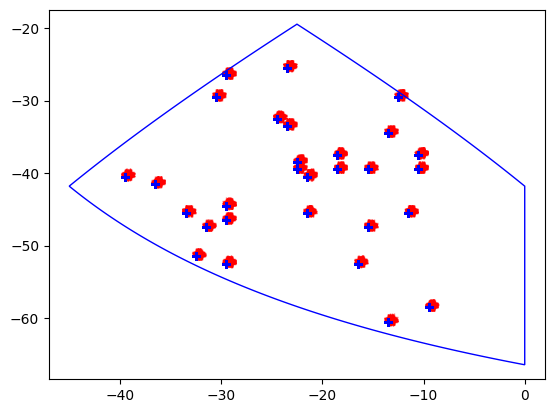

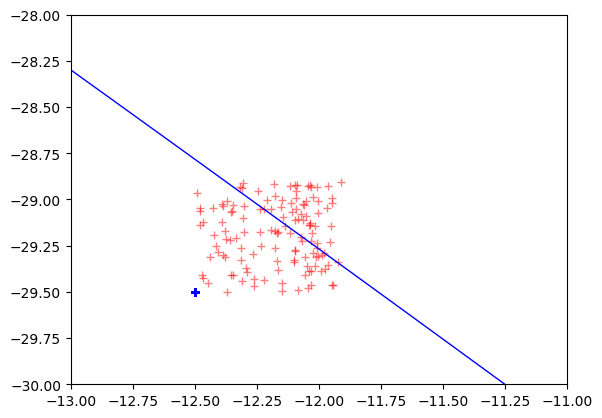

In [11]:
jc = joined.get_partition(order, pixel).compute()
plot_points([jc, jc], order, pixel, ['red', 'blue'], ['source_ra_small_sky_order1_source', 'ra_small_sky_order1'], ['source_dec_small_sky_order1_source', 'dec_small_sky_order1'], alpha=0.5)

plot_points([jc, jc], order, pixel, ['red', 'blue'], ['source_ra_small_sky_order1_source', 'ra_small_sky_order1'], ['source_dec_small_sky_order1_source', 'dec_small_sky_order1'], alpha=0.5, xlim=[-13, -11], ylim=[-30, -28])